<a href="https://colab.research.google.com/github/muhammadiskasujana/Data-Science-Project/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Churn

**Background**

Di tengah persaingan sengit industri telekomunikasi, perusahaan-perusahaan berjuang keras untuk mempertahankan pelanggan mereka. Salah satu tantangan utama adalah Customer Churn, di mana kehilangan pelanggan secara terus-menerus dapat mengakibatkan penurunan pendapatan dan reputasi perusahaan.

**Goal**


Customer Churn Prediction menjadi krusial karena membantu mengurangi kerugian pendapatan, meningkatkan retensi pelanggan, meningkatkan efisiensi operasional, pengalaman pelanggan, dan menciptakan keunggulan kompetitif.


**Objective**

*   Mengetahui pola churn
*   Membuat model ML yang dapat memprediksi churn


# Load Data

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data Train.csv to Data Train.csv


In [ ]:
df_train = pd.read_csv(io.BytesIO(uploaded['Data Train.csv']))
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
features = df_train.columns
print('data features : \n', features)

data features : 
 Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')


# Exploratory Data Analysis


In [ ]:
size = df_train.shape

num_rows = size[0]
num_columns = size[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 4250
Number of columns: 20


**Data Overview**

In [ ]:
df_summary = pd.DataFrame({
  'column': df_train.columns,
  'datatype': df_train.dtypes,
  'unique_values': df_train.nunique(),
  'unique_sample': df_train.columns.map(lambda col: df_train[col].unique()[:5]),
})

df_summary


,column,datatype,unique_values,unique_sample
state,state,object,51,"[OH, NJ, OK, MA, MO]"
account_length,account_length,int64,215,"[107, 137, 84, 75, 121]"
area_code,area_code,object,3,"[area_code_415, area_code_408, area_code_510]"
international_plan,international_plan,object,2,"[no, yes]"
voice_mail_plan,voice_mail_plan,object,2,"[yes, no]"
number_vmail_messages,number_vmail_messages,int64,46,"[26, 0, 24, 37, 27]"
total_day_minutes,total_day_minutes,float64,1843,"[161.6, 243.4, 299.4, 166.7, 218.2]"
total_day_calls,total_day_calls,int64,120,"[123, 114, 71, 113, 88]"
total_day_charge,total_day_charge,float64,1843,"[27.47, 41.38, 50.9, 28.34, 37.09]"
total_eve_minutes,total_eve_minutes,float64,1773,"[195.5, 121.2, 61.9, 148.3, 348.5]"


**Numerical data**

In [ ]:
num_cols = [col for col in df_train.columns if pd.api.types.is_numeric_dtype(df_train[col])]
print("numerical columns:")
for col in num_cols:
    print(col)

numerical columns:
account_length
number_vmail_messages
total_day_minutes
total_day_calls
total_day_charge
total_eve_minutes
total_eve_calls
total_eve_charge
total_night_minutes
total_night_calls
total_night_charge
total_intl_minutes
total_intl_calls
total_intl_charge
number_customer_service_calls


Deskripsi dari kolom:

1. **account_length**: Panjang atau durasi akun pelanggan dalam bulan.
2. **number_vmail_messages**: Jumlah pesan voicemail yang diterima oleh pelanggan.
3. **total_day_minutes**: Total jumlah menit yang digunakan pelanggan selama siang hari.
4. **total_day_calls**: Total jumlah panggilan yang dilakukan pelanggan selama siang hari.
5. **total_day_charge**: Biaya total yang dibebankan kepada pelanggan untuk penggunaan selama siang hari.
6. **total_eve_minutes**: Total jumlah menit yang digunakan pelanggan selama sore hari.
7. **total_eve_calls**: Total jumlah panggilan yang dilakukan pelanggan selama sore hari.
8. **total_eve_charge**: Biaya total yang dibebankan kepada pelanggan untuk penggunaan selama sore hari.
9. **total_night_minutes**: Total jumlah menit yang digunakan pelanggan selama malam hari.
10. **total_night_calls**: Total jumlah panggilan yang dilakukan pelanggan selama malam hari.
11. **total_night_charge**: Biaya total yang dibebankan kepada pelanggan untuk penggunaan selama malam hari.
12. **total_intl_minutes**: Total jumlah menit yang digunakan pelanggan untuk panggilan internasional.
13. **total_intl_calls**: Total jumlah panggilan internasional yang dilakukan pelanggan.
14. **total_intl_charge**: Biaya total yang dibebankan kepada pelanggan untuk panggilan internasional.
15. **number_customer_service_calls**: Jumlah panggilan yang dilakukan oleh pelanggan ke layanan pelanggan.

In [ ]:
# Descriptive Statistical Summary for Numeric Columns
print("Descriptive Statistical Summary:")
descriptions_numerical = df_train[num_cols].describe().T
descriptions_numerical['skewness'] = df_train[num_cols].skew()

# Calculating Range
range_values = df_train[num_cols].max() - df_train[num_cols].min()
descriptions_numerical['range'] = range_values

descriptions_numerical

Descriptive Statistical Summary:


,count,mean,std,min,25%,50%,75%,max,skewness,range
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00,0.122327,242.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00,1.373091,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50,-0.006910,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00,-0.085812,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76,-0.006913,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30,-0.030415,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00,-0.020812,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54,-0.030388,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00,0.008491,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00,0.005273,175.00


**Categorical columns**

In [ ]:
cat_cols = df_train.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:")
for col in cat_cols:
  print(col)

Categorical columns:
state
area_code
international_plan
voice_mail_plan
churn


**Deskripsi kolom:**

1. **State**: Menyatakan negara bagian tempat tinggal pelanggan, ada 51 negara bagian berbeda dalam dataset.

2. **Area Code**: Menunjukkan kode area — area_code_415, area_code_408, area_code_510

3. **International Plan**: Menunjukkan apakah pelanggan telah mendaftar untuk paket internasional — 'yes' atau 'no'.

4. **Voice Mail Plan**: Menandakan status langganan pelanggan terhadap paket voicemail — 'yes' atau 'no'.

5. **Churn**: Menggambarkan apakah pelanggan telah meninggalkan layanan 'yes' atau masih menjadi pelanggan 'no'.

In [ ]:
# Generate descriptive statistical summary for categorical columns in df_train
description_categorical = df_train.describe(include='object').T
description_categorical['value_counts'] = [df_train[col].value_counts().to_dict() for col in description_categorical.index]  # Proportion of each value
description_categorical

,count,unique,top,freq,value_counts
state,4250,51,WV,139,"{'WV': 139, 'MN': 108, 'ID': 106, 'AL': 101, '..."
area_code,4250,3,area_code_415,2108,"{'area_code_415': 2108, 'area_code_408': 1086,..."
international_plan,4250,2,no,3854,"{'no': 3854, 'yes': 396}"
voice_mail_plan,4250,2,no,3138,"{'no': 3138, 'yes': 1112}"
churn,4250,2,no,3652,"{'no': 3652, 'yes': 598}"


**Rangkuman:**



*   Dataset terdiri dari 4250 baris dan 20 kolom
*   Dataset terdiri dari 15 kolom numerik (tipe data: int dan float) dan 5 kolom kategorikal (tipe data: object)


In [ ]:
import plotly.express as px

def plot_pie_chart(data, column):
    counts = data[column].value_counts()
    fig = px.pie(names=counts.index, values=counts.values, title=f'pie chart of {column}', color_discrete_sequence=['purple', 'mediumpurple'])
    fig.update_layout(width=800, height=800)
    fig.show()
plot_pie_chart(df_train, 'churn')



*   Kelas yes dan no tidak seimbang
*   Kelas ‘yes’ sebanyak 598 dan kelas
‘no’ sebanyak 3652
*   Persentase pelanggan yang beralih
ke operator lain sebesar 14%

In [ ]:
import plotly.express as px
cat_cols = [col for col in cat_cols if col != 'churn']
for feature in cat_cols:
    counts = df_train.groupby([feature, 'churn']).size().reset_index(name='count')
    total_data = counts['count'].sum()
    counts['percentage'] = (counts['count'] / total_data) * 100

    fig = px.bar(
        counts, x=feature,
        y='count', color='churn',
        title=f'comparison of {feature} by churn',
        text='percentage',
        color_discrete_sequence=['purple', 'mediumpurple'])
    fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
    fig.show()



*    Customers yang memiliki international plan
memiliki kecendrungan untuk churn sebesar 42%
*   Customers yang tidak memiliki voice mail
plan cenderung untuk churn sebesar 16%
*    Persentase churn cenderung merata di
antara semua area code (13-15%)
*   Persentase churn cenderung merata di antara semua state (0,1-0,4%)





In [ ]:
def crosstab_function(df, var):
    tab = pd.DataFrame(pd.crosstab(df[var], df["churn"], margins=True)).reset_index()
    tab['churn_percentage'] = tab['yes'] / tab['All'] * 100
    tab.columns = [var, 'total','churn_no', 'churn_yes', 'churn_percentage']
    return tab
crosstab_function(df_train, 'international_plan')

,international_plan,total,churn_no,churn_yes,churn_percentage
0,no,3423,431,3854,11.183186
1,yes,229,167,396,42.171717
2,All,3652,598,4250,14.070588


In [ ]:
crosstab_function(df_train, 'voice_mail_plan')

,voice_mail_plan,total,churn_no,churn_yes,churn_percentage
0,no,2622,516,3138,16.443595
1,yes,1030,82,1112,7.374101
2,All,3652,598,4250,14.070588


In [ ]:
crosstab_function(df_train, 'area_code')

,area_code,total,churn_no,churn_yes,churn_percentage
0,area_code_408,934,152,1086,13.996317
1,area_code_415,1821,287,2108,13.614801
2,area_code_510,897,159,1056,15.056818
3,All,3652,598,4250,14.070588


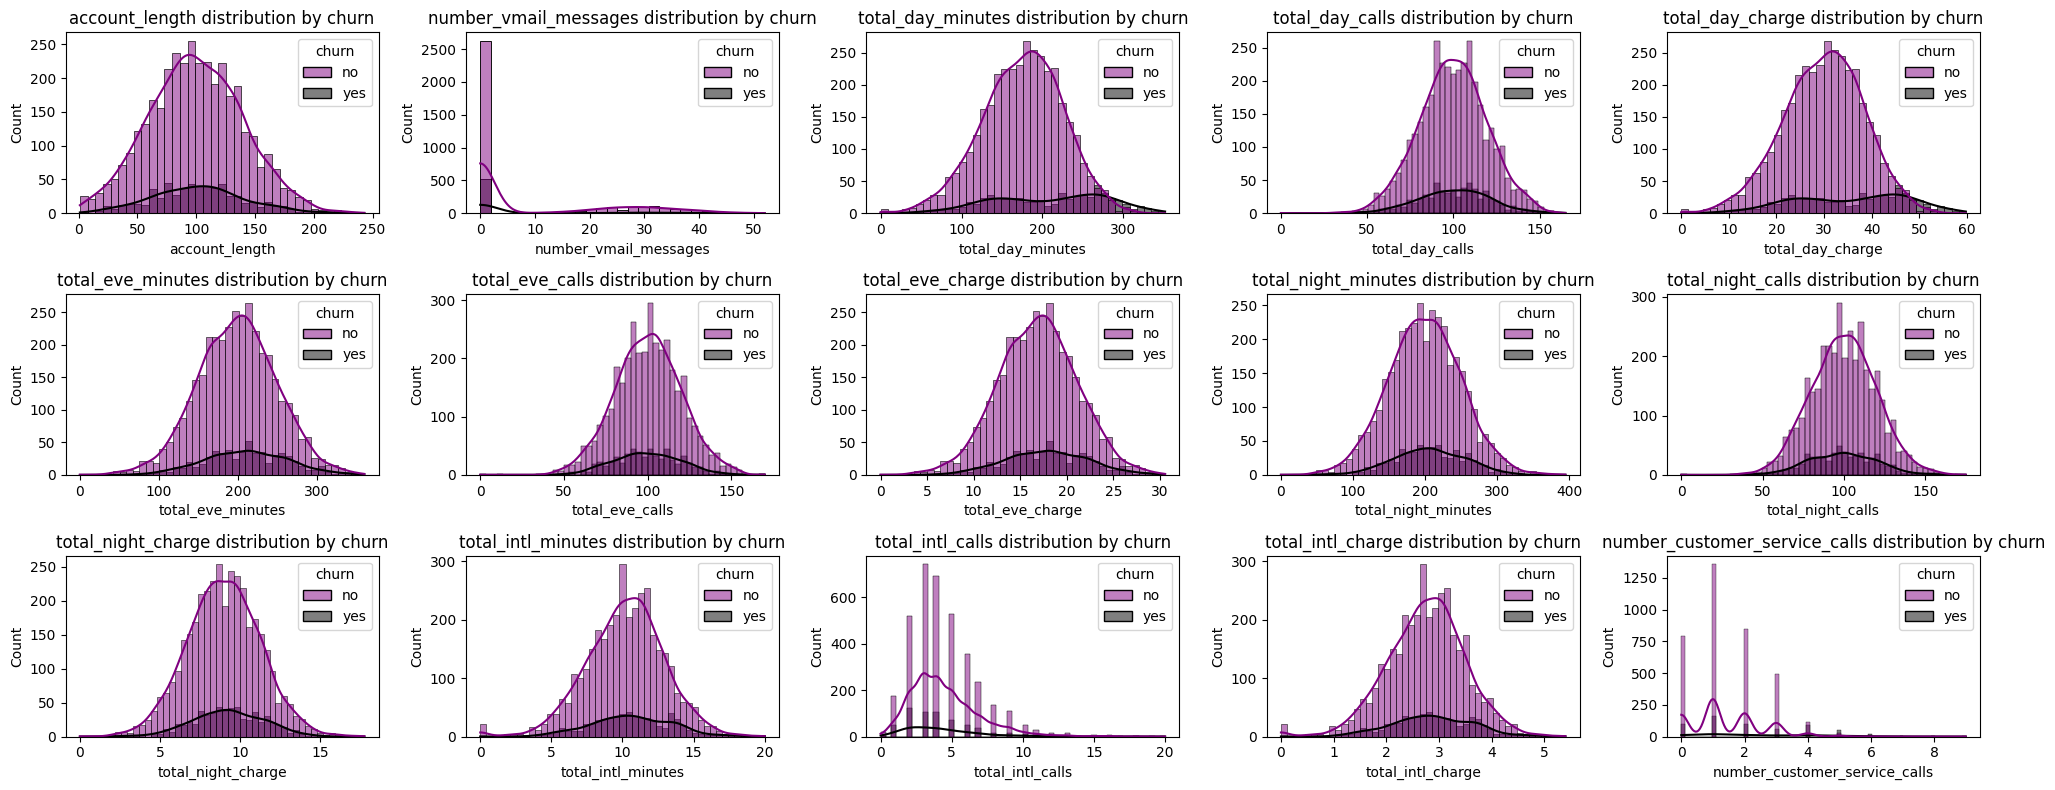

In [ ]:
plt.figure(figsize=(20, 8))
for i, col in enumerate(num_cols):
    plt.subplot(3, 5, i+1)
    sns.histplot(data=df_train, x=col, hue='churn', palette=['purple', 'black'],
                 kde=True, fill=True).set(title=f'{col} distribution by churn')
plt.tight_layout()
plt.show()



*   Mayoritas distribusi data bersifat normal
*   Kolom number_vmail_messages, total_intl_calls dan number_customer_service_calls cenderung positif skewed

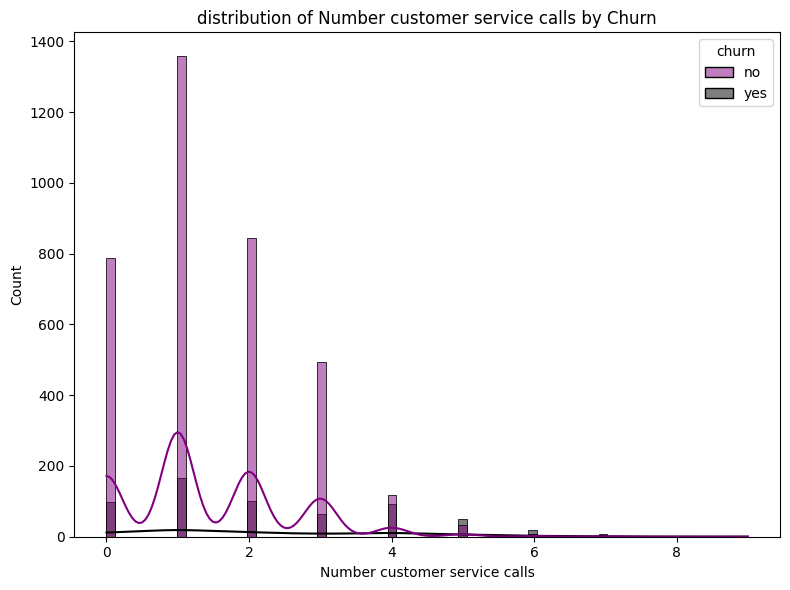

In [ ]:
def plot_churn_distribution(df, x, hue, palette=['purple', 'black']):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=x, hue=hue, palette=palette, kde=True, fill=True)
    plt.title('distribution of ' + x.replace('_', ' ').capitalize() + ' by ' + hue.capitalize())
    plt.xlabel(x.replace('_', ' ').capitalize())
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

plot_churn_distribution(df_train, 'number_customer_service_calls', 'churn')

In [ ]:
crosstab_function(df_train, 'number_customer_service_calls')

,number_customer_service_calls,total,churn_no,churn_yes,churn_percentage
0,0,789,97,886,10.948081
1,1,1358,166,1524,10.892388
2,2,845,102,947,10.770855
3,3,495,63,558,11.290323
4,4,117,92,209,44.019139
5,5,32,49,81,60.493827
6,6,9,19,28,67.857143
7,7,6,7,13,53.846154
8,8,1,1,2,50.000000
9,9,0,2,2,100.000000




*   Terlihat bahwa panggilan ke customer service yang ke-4 hingga seterusnya terjadi peningkatan churn rate
*   Bisa jadi ini menandakan kualitas costumer service yang buruk



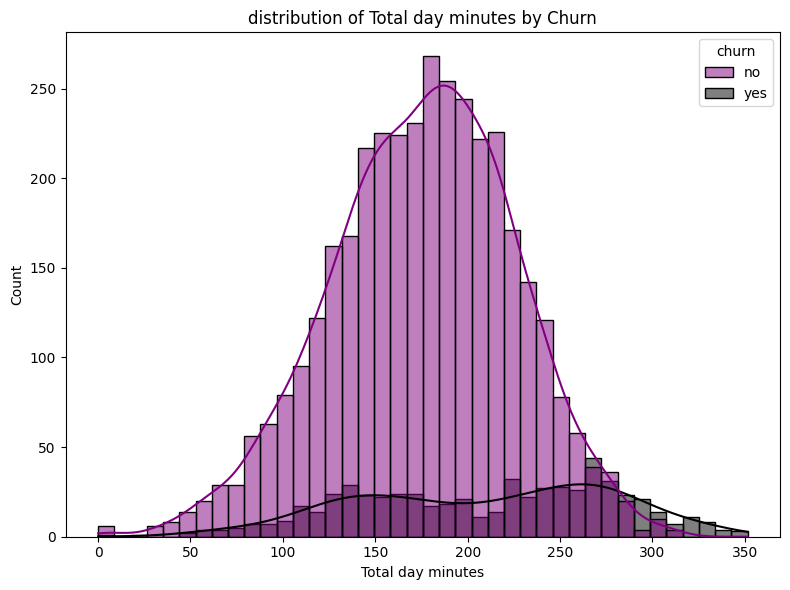

In [ ]:
plot_churn_distribution(df_train, 'total_day_minutes', 'churn')

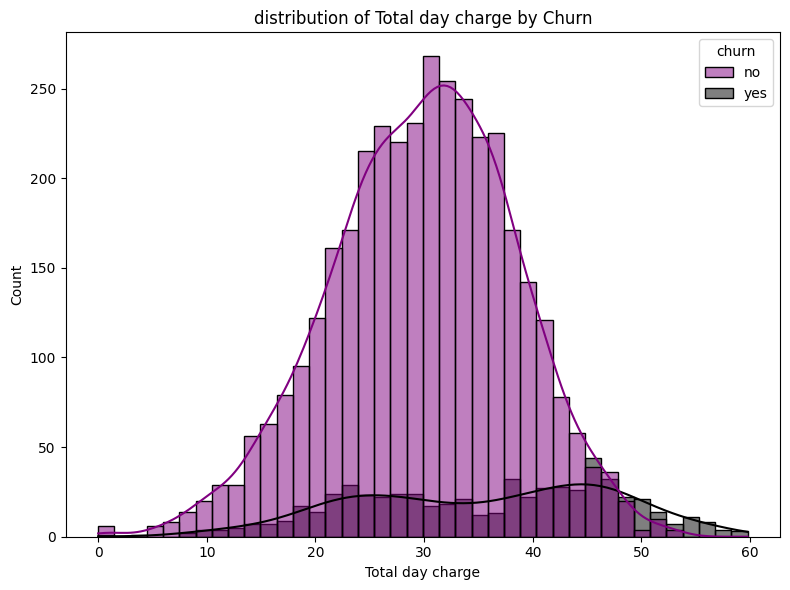

In [ ]:
plot_churn_distribution(df_train, 'total_day_charge', 'churn')

Semakin tinggi durasi panggilan di siang hari dan biayanya, churn rate juga ikut meningkat apalagi setelah lebih dari 300 menit

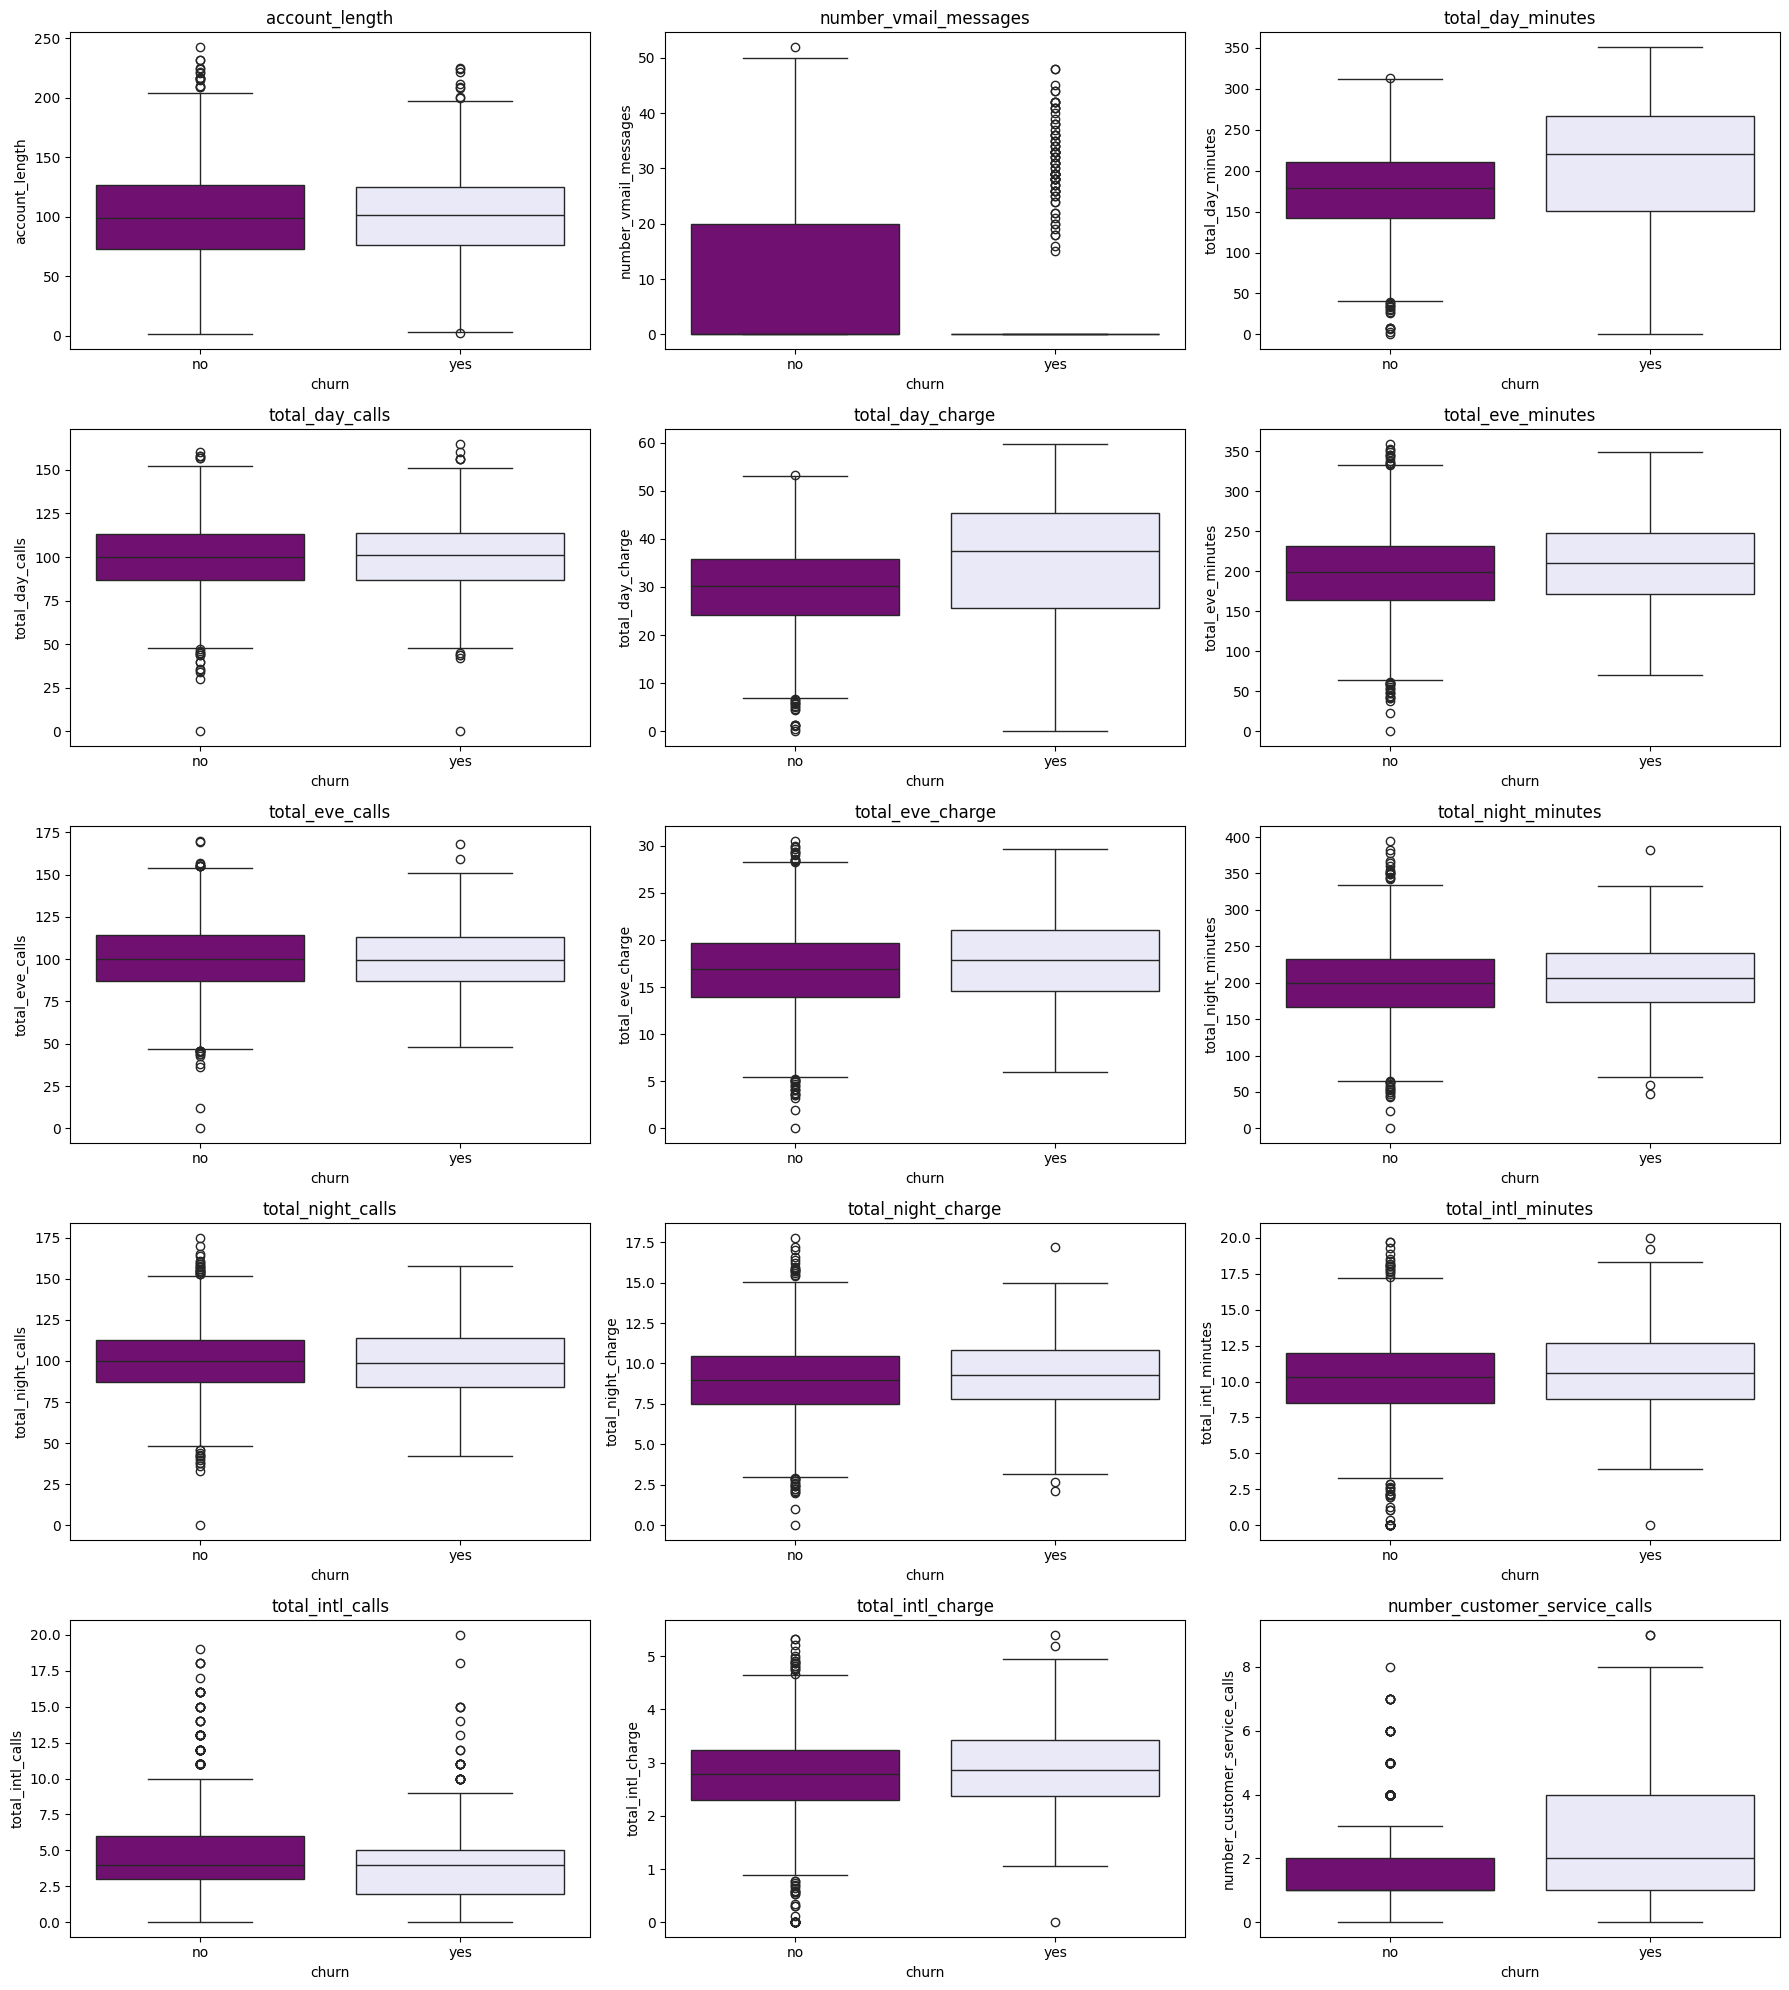

In [ ]:
def plot_boxplots(df, num_cols, churn_col):
    num_subplots = len(num_cols)
    num_rows = (num_subplots + 2) // 3
    num_cols_subplot = min(num_subplots, 3)
    fig, axes = plt.subplots(num_rows, num_cols_subplot, figsize=(num_cols_subplot * 6, num_rows * 4))
    custom_palette = ["purple", "lavender"]
    for i, col_name in enumerate(num_cols):
        ax = axes[i // 3, i % 3] if num_rows > 1 else axes[i % 3]
        sns.boxplot(x=churn_col, y=col_name, data=df, hue=churn_col, palette=custom_palette, ax=ax, legend=False)
        ax.set_title(col_name)
    plt.tight_layout()
    plt.show()
plot_boxplots(df_train, num_cols, 'churn')

In [ ]:
total_duplicates = df_train.duplicated().sum()
total_missing_values = df_train.isnull().sum().sum()
print("Missing values per numeric column:")
print('\n', df_train.select_dtypes(include='number').isnull().sum())
print('\nTotal Duplicates:', total_duplicates)
print('Total Missing Values:', total_missing_values)

Missing values per numeric column:

 account_length                   0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

Total Duplicates: 0
Total Missing Values: 0


In [ ]:
def detect_outliers(df_train, num_cols):
    outliers_dict = {}
    total_outliers = 0
    for col in num_cols:
        Q1 = df_train[col].quantile(0.25)
        Q3 = df_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count = ((df_train[col] < lower_bound) | (df_train[col] > upper_bound)).sum()
        outliers_dict[col] = outliers_count
        total_outliers += outliers_count

    return outliers_dict, total_outliers

In [ ]:
outliers_dict, total_outliers = detect_outliers(df_train, num_cols)
print("Outliers detected per column:")
for col, count in outliers_dict.items():
    print(f"{col}: {count}")
print("Total Outliers:", total_outliers)

Outliers detected per column:
account_length: 20
number_vmail_messages: 86
total_day_minutes: 25
total_day_calls: 28
total_day_charge: 26
total_eve_minutes: 34
total_eve_calls: 24
total_eve_charge: 34
total_night_minutes: 37
total_night_calls: 33
total_night_charge: 37
total_intl_minutes: 62
total_intl_calls: 100
total_intl_charge: 62
number_customer_service_calls: 335
Total Outliers: 943




*   Semua fitur terlihat memiliki outliers yang berjumlah 943
*   Tidak ada data yang hilang atau duplikat

dalam menangani outliers, nilai fitur akan direplace dengan nilai median

In [ ]:
df_out = df_train.copy()
def replace_outliers(df, labels):
    for label in labels:
        q1 = df_out[label].quantile(0.25)
        q3 = df_out[label].quantile(0.75)
        iqr = q3 - q1
        max_val = q3 + 1.5 * iqr
        min_val = q1 - 1.5 * iqr
        df_out[label] = np.where(df_out[label] > max_val, max_val, np.where(df_out[label] < min_val, min_val, df_out[label]))
        df_out[label] = df_out[label].mask(df_out[label] > max_val, df_out[label].mean())
    return df_out

In [ ]:
df_cleaned = replace_outliers(df_out, num_cols)

In [ ]:
outliers_dict, total_outliers = detect_outliers(df_cleaned, num_cols)
print("Outliers detected per column:")
for col, count in outliers_dict.items():
    print(f"{col}: {count}")
print("Total Outliers:", total_outliers)

Outliers detected per column:
account_length: 0
number_vmail_messages: 0
total_day_minutes: 0
total_day_calls: 0
total_day_charge: 0
total_eve_minutes: 0
total_eve_calls: 0
total_eve_charge: 0
total_night_minutes: 0
total_night_calls: 0
total_night_charge: 0
total_intl_minutes: 0
total_intl_calls: 0
total_intl_charge: 0
number_customer_service_calls: 0
Total Outliers: 0


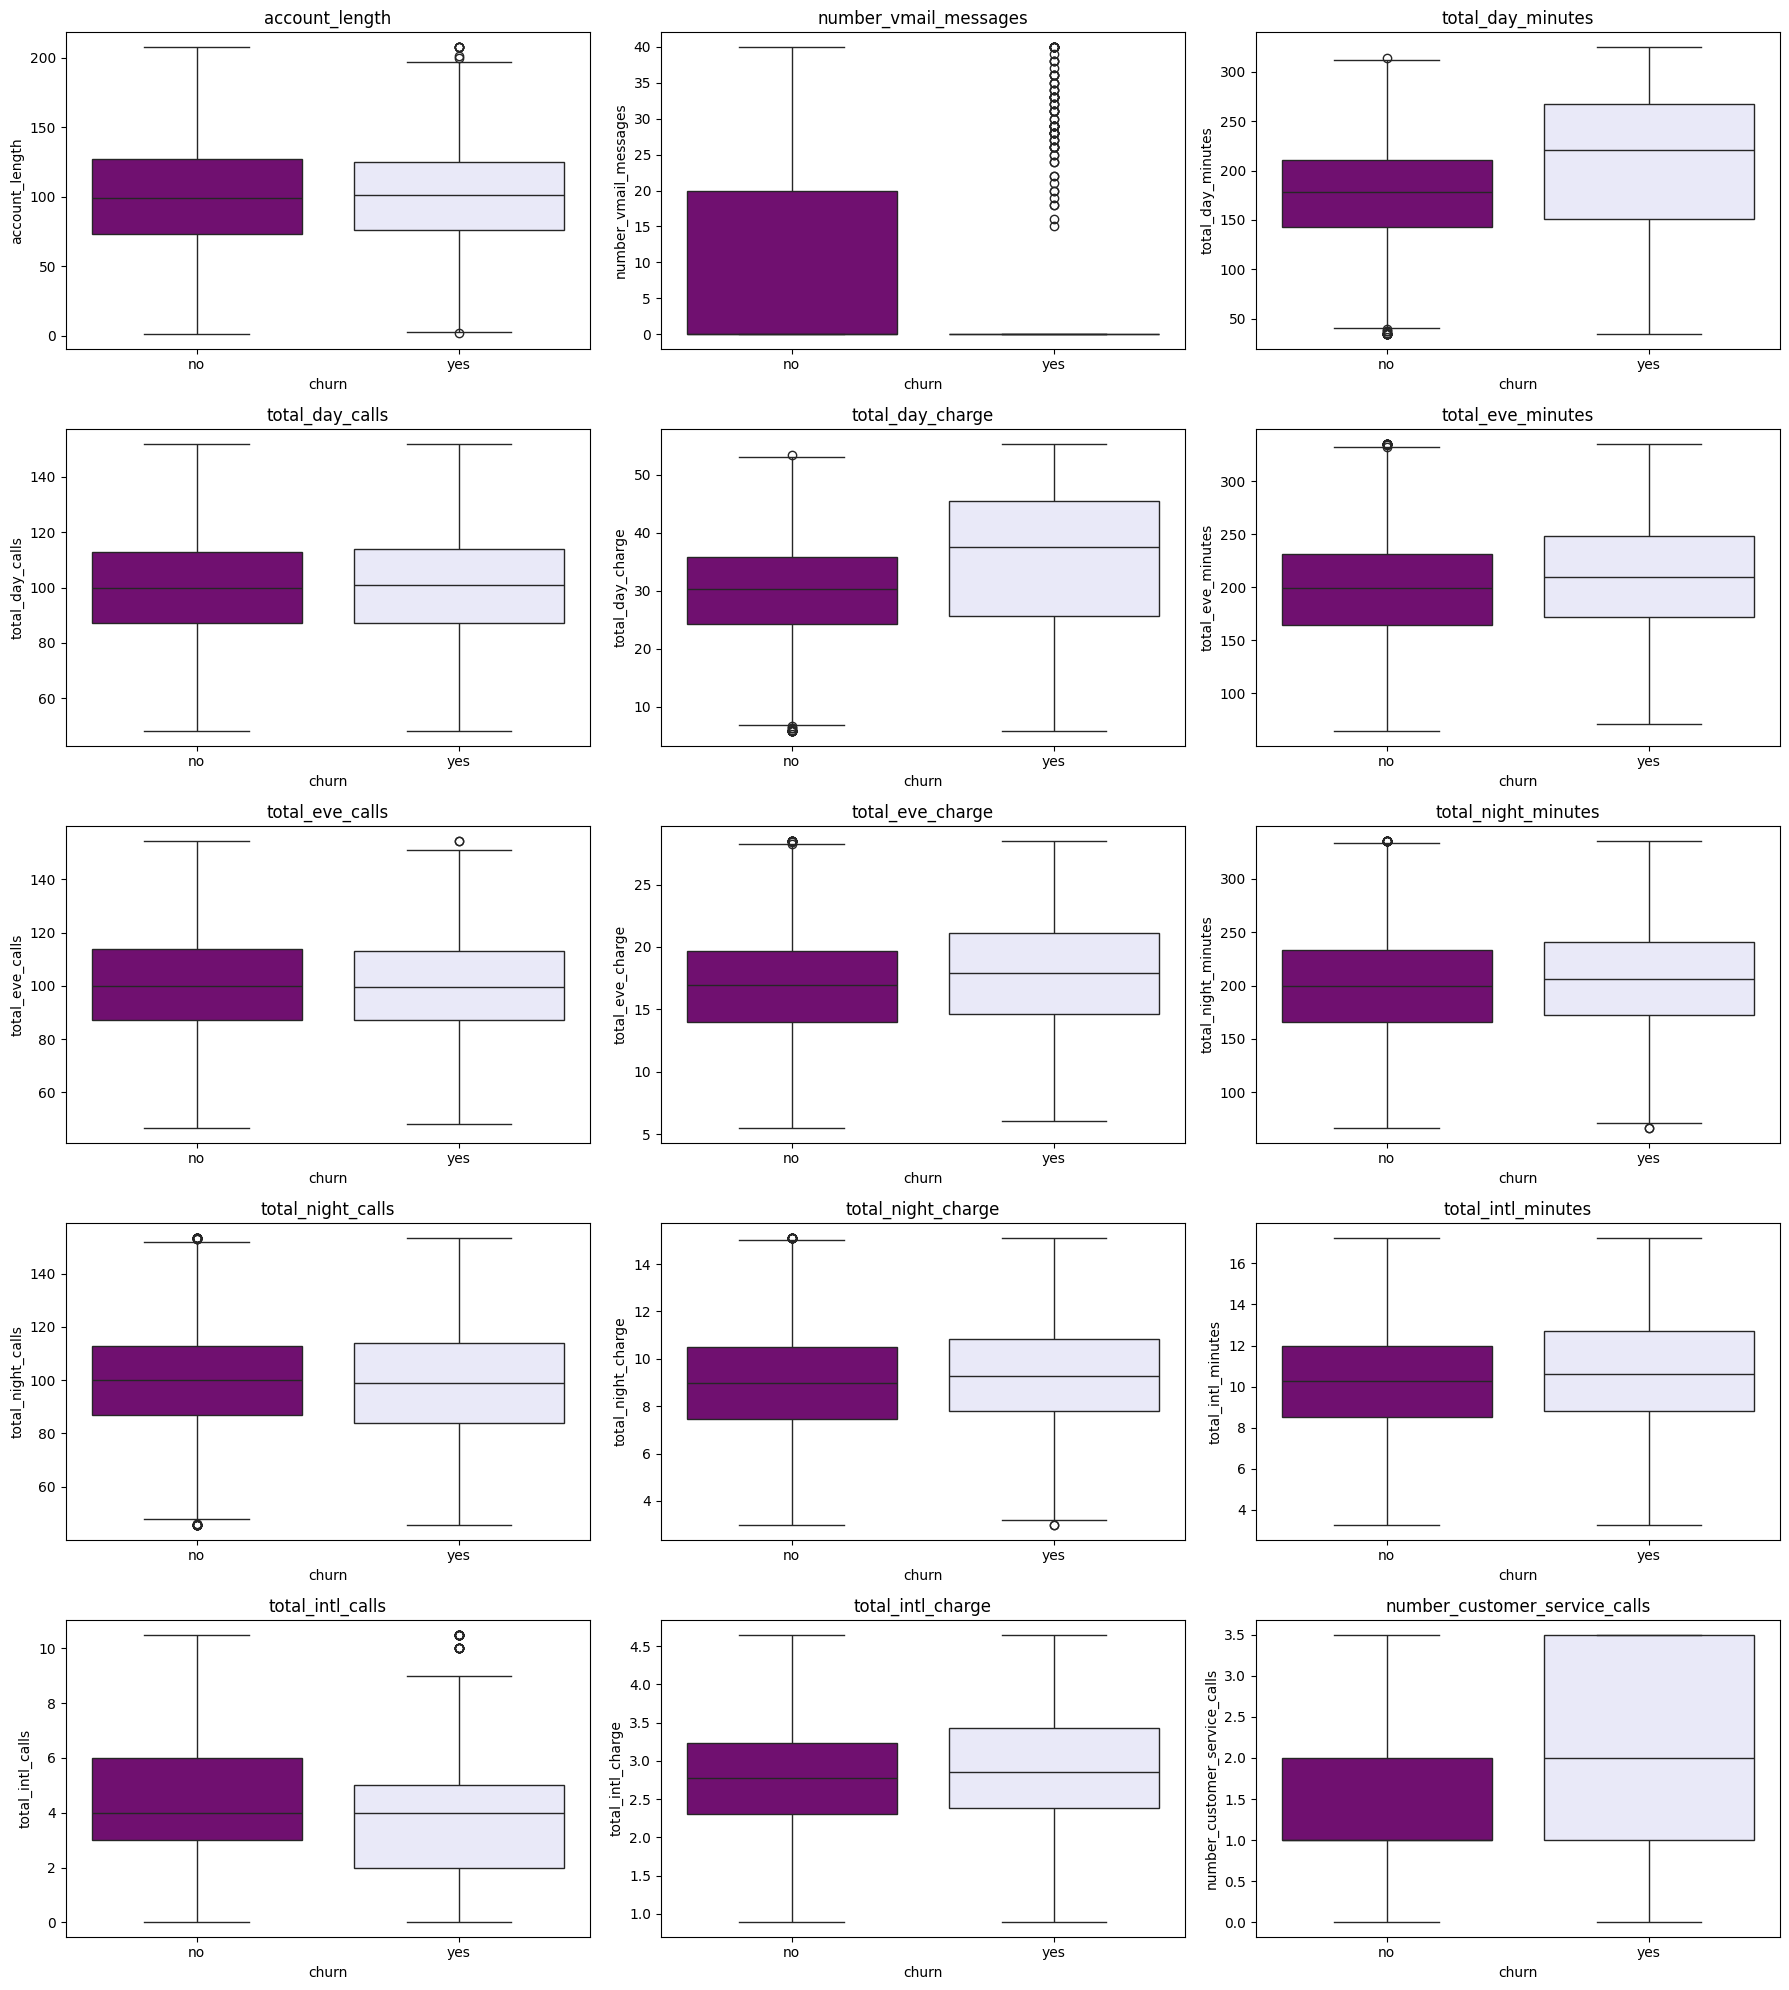

In [ ]:
plot_boxplots(df_cleaned, num_cols, 'churn')


*   Number costumer service calls, total day minutes dan total day charge berpengaruh pada churn. semakin tinggi nilainya, maka semakin tinggi churn
*   Number vmal messages tidak terpengaruh sama sekali pada churn.


# Label Encoding

In [ ]:
df_clean = df_cleaned.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encode(df):
    le = LabelEncoder()
    for col in df.columns:
        if df[col].dtype == 'O':
            df[col] = le.fit_transform(df[col])
    return df

In [ ]:
df_clean_encoded = label_encode(df_clean)

In [ ]:
fig = px.imshow(df_clean.corr().round(2), color_continuous_scale='viridis', text_auto=True)
fig.update_layout(title='correlation heatmap',
                  showlegend=False,
                  height=1000,
                  width=1000)
fig.show()




*   Adanya korelasi sangat tinggi antara fitur minutes dan charge karena biaya panggilan berkorelasi dengan durasi
*   Fitur international plan (0,26), total day minutes (0,21), total day charge (0,21), dan number customer service calls (0,17)  menunjukkan korelasi lumayan tinggi dengan churn
*   Korelasi antara voice mail plan dan
number vmail messages juga tinggi





In [ ]:
import plotly.graph_objects as go

df_clean_corr_churn = df_clean.corr()['churn'].sort_values(ascending=False)
fig = go.Figure(data=[go.Bar(x=df_clean_corr_churn.index, y=df_clean_corr_churn.values, marker_color='purple')])
fig.update_layout(title='correlation with churn', xaxis_title='features', yaxis_title='correlation')
fig.show()


*   International plan, total day minutes, total day charge, number customer service days berkorelasi positif terhadap churn.
*   Voice mail plan berkorelasi negative, artinya jika satu variabel meningkat, variabel lainnya cenderung menurun. Disini, semakin banyak nilai ‘no’ vmail plan maka makin tinggi churn


# Feature Engineering

In [ ]:
df_prep = df_clean.copy()

In [ ]:
def preprocess(df):
    df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
    df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
    df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']
    df.drop(columns=['state', 'area_code', 'account_length', 'total_day_minutes', 'total_eve_minutes',
                     'total_night_minutes', 'total_day_calls', 'total_eve_calls', 'total_night_calls',
                     'total_day_charge', 'total_eve_charge', 'total_night_charge'], inplace=True)
    return df


*   Fitur total calls, total minutes dan total charge adalah hasil reduksi fitur untuk waktu siang hingga malam dengan menjumlahkannya
*   Menghapus kolom yang tidak diperlukan

In [ ]:
# Separate features and labels
X = df_prep.drop('churn', axis=1)
y = df_prep['churn']

# Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# PCA

In [ ]:
"""from sklearn.decomposition import PCA

def apply_pca(X, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    return X_pca

n_components = 5
X_pca = apply_pca(X_scaled, n_components)"""

Analisis Komponen Utama (PCA) adalah teknik reduksi dimensi yang umum digunakan dalam machine learning.

PCA mentransformasikan data ke dalam sistem koordinat baru di mana varians terbesar berada pada komponen utama pertama, varians terbesar kedua pada komponen utama kedua, dan seterusnya.

Dengan mereduksi dimensi dataset sambil mempertahankan sebagian besar varians, PCA membantu menyederhanakan data dan meningkatkan kinerja algoritma machine learning.

# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(3400, 5) (850, 5)




*   Sebelumnya sudah dilakukan label encoding pada kolom kategorikal, untuk mengubah nilainya menjadi numerik secara berurutan (0 dan 1)
*   Split data menjadi data latih dan data uji denganperbandingan 80:20
*   Penskalaan fitur dengan MinMaxScaler() untuk menormalkan nilai-nilai fitur numerik ke dalam rentang antara 0 dan 1


# Over Sampling

In [ ]:
""" from imblearn.over_sampling import RandomOverSampler

def handle_class_imbalance(x_train, y_train, sampling_strategy='auto'):
    oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
    x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train, y_train)
    return x_train_resampled, y_train_resampled

x_train_resampled, y_train_resampled = handle_class_imbalance(x_train, y_train)

print("Original class distribution:", pd.Series(y_train).value_counts())
print("Resampled class distribution:", pd.Series(y_train_resampled).value_counts()) """

' from imblearn.over_sampling import RandomOverSampler\n\ndef handle_class_imbalance(X_train, y_train, sampling_strategy=\'auto\'):\n    oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)\n    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)\n    return X_train_resampled, y_train_resampled\n\nX_train_resampled, y_train_resampled = handle_class_imbalance(X_train, y_train)\n\nprint("Original class distribution:", pd.Series(y_train).value_counts())\nprint("Resampled class distribution:", pd.Series(y_train_resampled).value_counts()) '

In [ ]:
"""x_train = x_train_resampled
y_train = y_train_resampled"""

'x_train = X_train_resampled\ny_train = y_train_resampled\nx_test = X_test\ny_test = y_test'

Kode di atas merupakan sebuah fungsi Python yang bertujuan untuk mengatasi ketidakseimbangan kelas dalam data pelatihan. Fungsi ini menggunakan metode RandomOverSampler dari pustaka imbalanced-learn. Fungsi ini menerima matriks fitur x_train dan label target y_train sebagai input, serta parameter opsional sampling_strategy yang menentukan strategi resampling yang akan digunakan. Nilai default untuk sampling_strategy adalah 'auto', yang mengatur rasio resampling secara otomatis untuk mencapai keseimbangan kelas. Fungsi ini mengembalikan matriks fitur dan label target yang sudah diresample. Contoh penggunaan fungsi ini juga ditunjukkan di bagian bawah, di mana hasil distribusi kelas sebelum dan setelah resampling dicetak.

In [ ]:
"""from imblearn.over_sampling import SMOTE, ADASYN

# Applying SMOTE for oversampling
smote = SMOTE(random_state=42)
x_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(x_train, y_train)

# Applying ADASYN for oversampling
adasyn = ADASYN(random_state=42)
x_train_resampled_adasyn, y_train_resampled_adasyn = adasyn.fit_resample(x_train, y_train)

print("Class Distribution after Oversampling (SMOTE):")
print(pd.Series(y_train_resampled_smote).value_counts())

print("\nClass Distribution after Oversampling (ADASYN):")
print(pd.Series(y_train_resampled_adasyn).value_counts())
x_train_resampled_adasyn = x_train
y_train_resampled_adasyn = y_train"""

Class Distribution after Oversampling (SMOTE):
0    2931
1    2931
Name: churn, dtype: int64

Class Distribution after Oversampling (ADASYN):
1    3012
0    2931
Name: churn, dtype: int64


# Data Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score

In [ ]:
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
roc_auc_list = []

def evaluate_model(algorithm, model_name, x_train, y_train, x_test, y_test):
    # Training the model
    model = algorithm.fit(x_train, y_train)

    # Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluating predictions
    evaluate_predictions(y_train, y_train_pred, 'Training', model_name)
    evaluate_predictions(y_test, y_test_pred, 'Testing', model_name)

    # Calculating evaluation metrics
    accuracy = round(accuracy_score(y_test, y_test_pred), 3)
    precision = round(precision_score(y_test, y_test_pred), 3)
    recall = round(recall_score(y_test, y_test_pred), 3)
    f1 = round(f1_score(y_test, y_test_pred), 3)
    roc_auc = round(roc_auc_score(y_test, y_test_pred), 3)

    # Appending evaluation metrics to lists
    model_list.append(model_name)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)
    roc_auc_list.append(roc_auc)

    return model

In [ ]:
def evaluate_predictions(y_true, y_pred, dataset_type, model_name):
    # Printing classification report
    print(f'\nClassification Report for {dataset_type} Dataset using {model_name} Model:')
    print(classification_report(y_true, y_pred))

    # Creating confusion matrix
    confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true, y_pred),
                                       index=['Not Churn', 'Churn'],
                                       columns=['Not Churn', 'Churn'])

    # Plotting confusion matrix
    plt.figure()
    heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

    plt.title(f'Confusion Matrix for {dataset_type} Dataset using {model_name} Model', fontsize=18, color='black')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.show()

Evaluating Logistic Regression...

Classification Report for Training Dataset using Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2931
           1       1.00      0.07      0.13       469

    accuracy                           0.87      3400
   macro avg       0.94      0.53      0.53      3400
weighted avg       0.89      0.87      0.82      3400



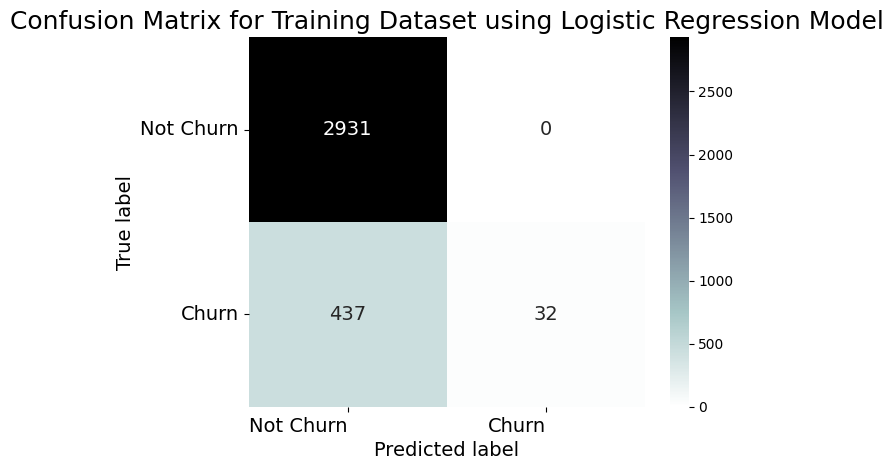


Classification Report for Testing Dataset using Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       721
           1       1.00      0.04      0.07       129

    accuracy                           0.85       850
   macro avg       0.93      0.52      0.50       850
weighted avg       0.88      0.85      0.79       850



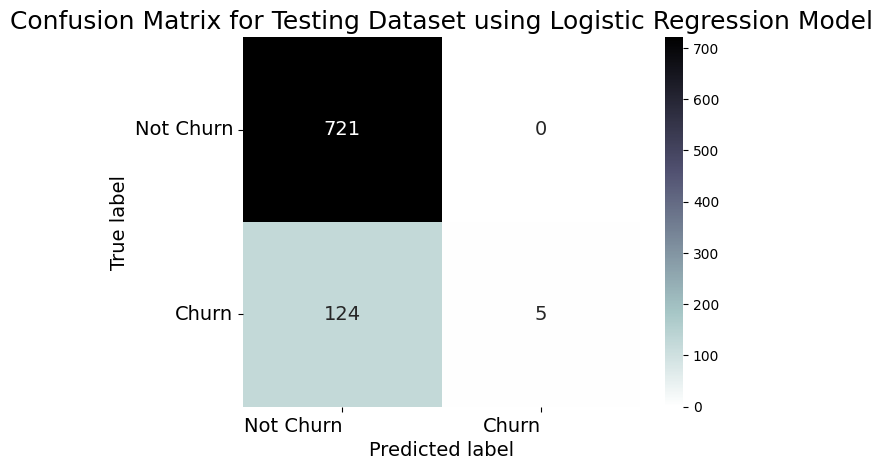

Evaluating Gradient Boosting...

Classification Report for Training Dataset using Gradient Boosting Model:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2931
           1       0.98      0.40      0.57       469

    accuracy                           0.92      3400
   macro avg       0.95      0.70      0.76      3400
weighted avg       0.92      0.92      0.90      3400



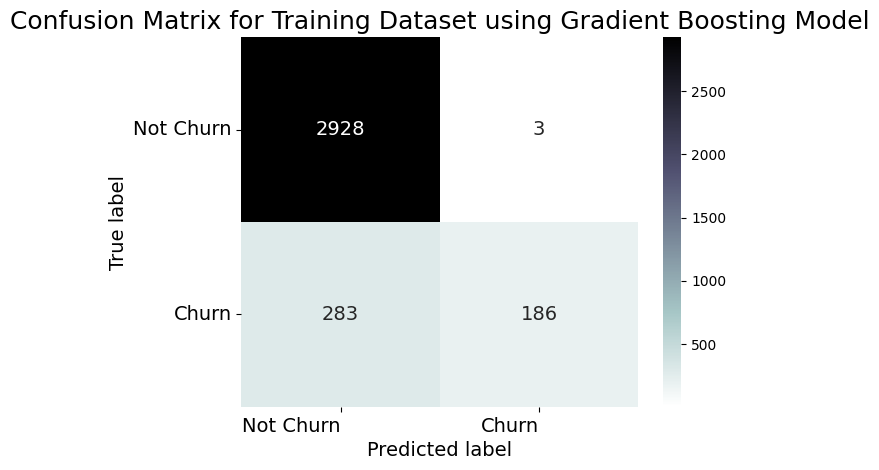


Classification Report for Testing Dataset using Gradient Boosting Model:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       721
           1       0.86      0.29      0.44       129

    accuracy                           0.89       850
   macro avg       0.88      0.64      0.69       850
weighted avg       0.88      0.89      0.86       850



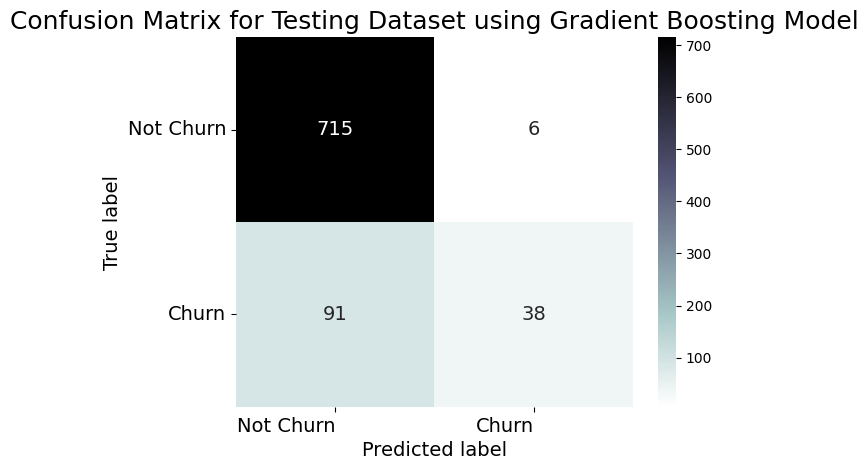

Evaluating Decision Tree...

Classification Report for Training Dataset using Decision Tree Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2931
           1       1.00      1.00      1.00       469

    accuracy                           1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400



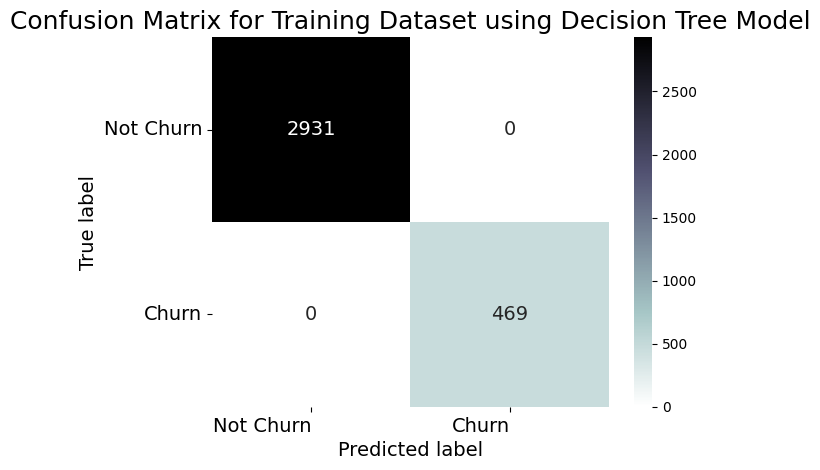


Classification Report for Testing Dataset using Decision Tree Model:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       721
           1       0.40      0.35      0.37       129

    accuracy                           0.82       850
   macro avg       0.64      0.63      0.63       850
weighted avg       0.81      0.82      0.82       850



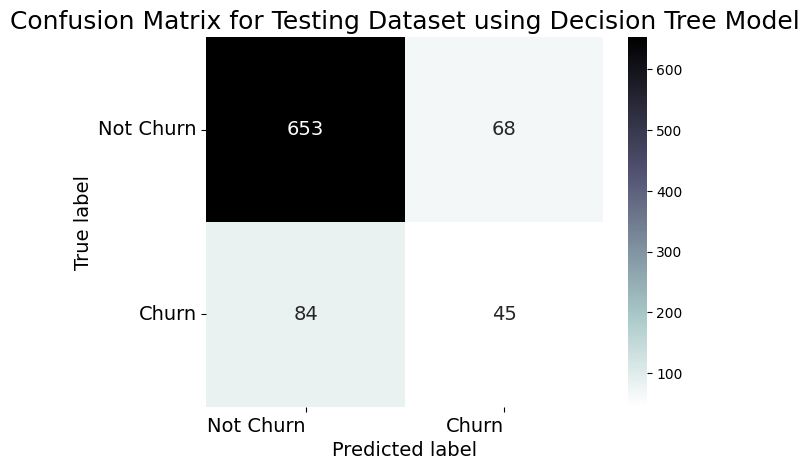

Evaluating Random Forest...

Classification Report for Training Dataset using Random Forest Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2931
           1       1.00      1.00      1.00       469

    accuracy                           1.00      3400
   macro avg       1.00      1.00      1.00      3400
weighted avg       1.00      1.00      1.00      3400



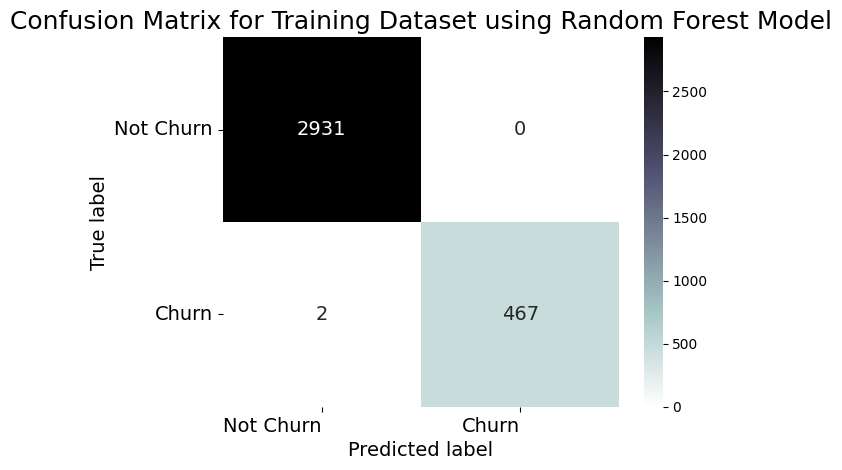


Classification Report for Testing Dataset using Random Forest Model:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       721
           1       0.88      0.35      0.50       129

    accuracy                           0.89       850
   macro avg       0.89      0.67      0.72       850
weighted avg       0.89      0.89      0.87       850



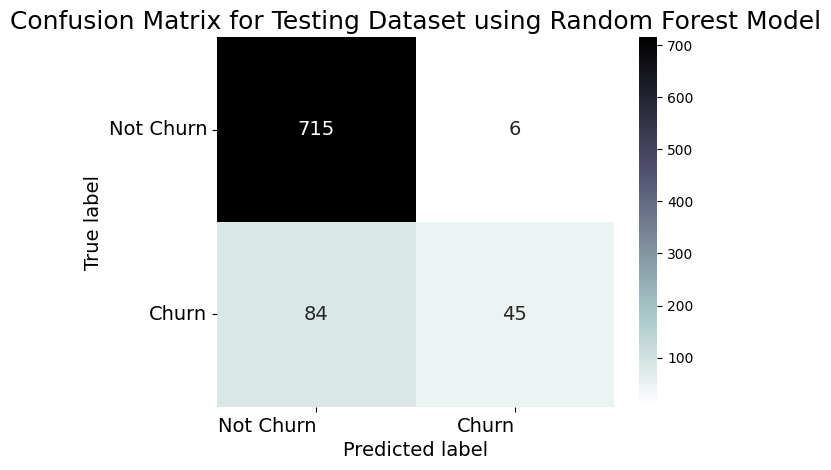

Evaluating K-Nearest Neighbor...

Classification Report for Training Dataset using K-Nearest Neighbor Model:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2931
           1       0.96      0.41      0.58       469

    accuracy                           0.92      3400
   macro avg       0.94      0.71      0.77      3400
weighted avg       0.92      0.92      0.90      3400



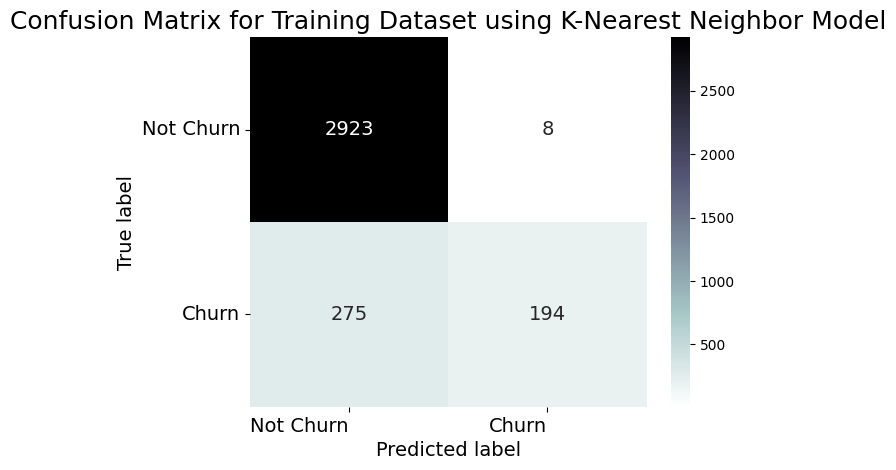


Classification Report for Testing Dataset using K-Nearest Neighbor Model:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       721
           1       0.84      0.37      0.52       129

    accuracy                           0.89       850
   macro avg       0.87      0.68      0.73       850
weighted avg       0.89      0.89      0.88       850



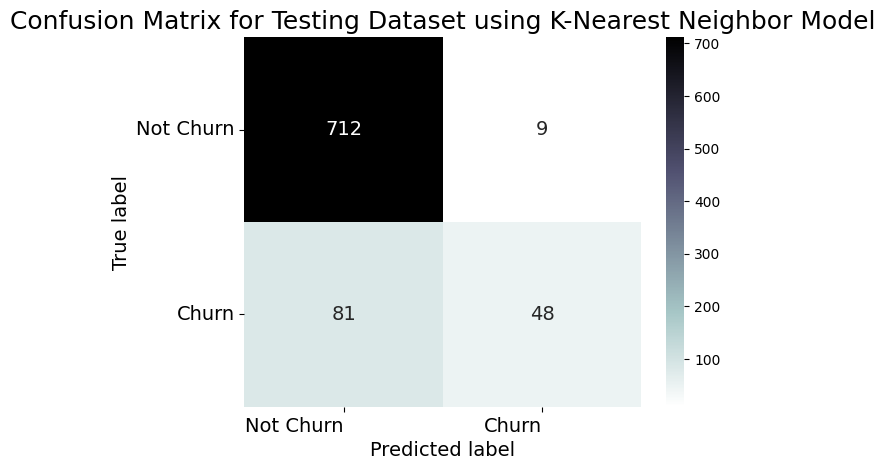

Evaluating Neural Network...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.




Classification Report for Training Dataset using Neural Network Model:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2931
           1       0.93      0.43      0.59       469

    accuracy                           0.92      3400
   macro avg       0.92      0.71      0.77      3400
weighted avg       0.92      0.92      0.90      3400



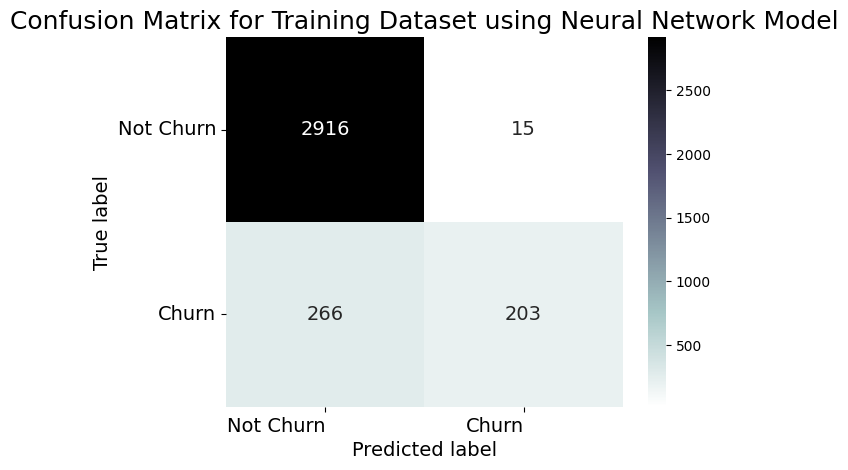


Classification Report for Testing Dataset using Neural Network Model:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       721
           1       0.92      0.43      0.58       129

    accuracy                           0.91       850
   macro avg       0.91      0.71      0.76       850
weighted avg       0.91      0.91      0.89       850



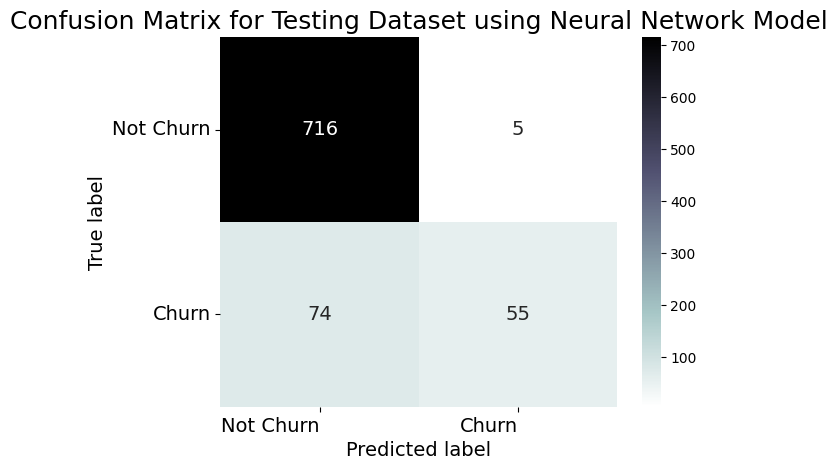

Evaluation Scores:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.854,1.000,0.039,0.075,0.519
1,Gradient Boosting,0.886,0.864,0.295,0.439,0.643
2,Decision Tree,0.818,0.388,0.349,0.367,0.625
3,Random Forest,0.892,0.849,0.349,0.495,0.669
4,K-Nearest Neighbor,0.894,0.842,0.372,0.516,0.680
5,Neural Network,0.906,0.915,0.419,0.574,0.706
6,Logistic Regression,0.854,1.000,0.039,0.075,0.519
7,Gradient Boosting,0.886,0.864,0.295,0.439,0.643
8,Decision Tree,0.821,0.398,0.349,0.372,0.627
9,Random Forest,0.894,0.882,0.349,0.500,0.670


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbor": KNeighborsClassifier(),
    "Neural Network": MLPClassifier()
}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    evaluate_model(model, model_name, x_train, y_train, x_test, y_test)

evaluation_df = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1 Score': f1_score_list,
    'ROC AUC': roc_auc_list
})

print("Evaluation Scores:")
evaluation_df

# Prediction

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df_test = pd.read_csv(io.BytesIO(uploaded['Data Test.csv']))
df_test.head()

In [ ]:
df_test.info()

In [ ]:
df_test_copy = df_test.copy()


In [ ]:
df_test_encode = label_encode(df_test_copy)

In [ ]:
df_test_prep = preprocess(df_test_encode)
df_test_prep.head()

In [ ]:
df_pred = df_test_prep.drop('id', axis=1)
df_pred.head()

In [ ]:
df_pred.info()

In [ ]:
def predict(model_name, df_pred, model_objects, x_train=None, y_train=None):
    if model_name not in model_objects:
        print(f"Error: Model {model_name} not found.")
        return None

    model = model_objects[model_name]()

    if x_train is not None and y_train is not None:
        model.fit(x_train, y_train)
    elif model_name == 'MLPClassifier':
        print("Error: Missing training data for training the MLP model.")
        return None

    predict = model.predict(df_pred)
    predicted_labels = ['yes' if pred == 1 else 'no' for pred in predict]
    results_subset = pd.DataFrame(predicted_labels, columns=['churn'])
    print('Model used:', model)
    return results_subset.head()

In [ ]:
#predict('Logistic Regression', df_pred, model_objects, x_train, y_train)
#predict('K-Nearest Neighbor', df_pred, model_objects, x_train, y_train)
#predict('Decision Tree', df_pred, model_objects, x_train, y_train)
predict('Random Forest', df_pred, model_objects, x_train, y_train)
#predict('Neural Network', df_pred, model_objects, x_train, y_train)
#predict('Gradient Boosting', df_pred, model_objects, x_train, y_train)